In [1]:
import torch
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
from torch_geometric.datasets import KarateClub

dataset = KarateClub()

print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

data = dataset[0]  # Get the first graph object.
print(data)

Number of graphs: 1
Number of features: 34
Number of classes: 4
Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])


The following result of the graph is expected: **Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])**

- x=[34, 34] is the node feature matrix with shape (number of nodes, number of features). In our case, it means that we have 34 nodes (our 34 members), each node being associated to a 34-dim feature vector. **Node Feature Matrix**

- edge_index=[2, 156] represents the graph connectivity. 156 edges with first row the source nodes and the second the target nodes.

- y=[34], representing the category label of every node

- train_mask = [34] is a boolean mask (list of True and False values) indicating which nodes should be used for training.


In [3]:
print(f'Shape of Node Feature Matrix:{data.x.shape}')
print(data.x)

Shape of Node Feature Matrix:torch.Size([34, 34])
tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.]])


The following result of the graph is expected: 

Shape of Node Feature Matrix:torch.Size([34, 34])
<br></br>
<br>tensor([[1., 0., 0.,  ..., 0., 0., 0.],  
    [0., 1., 0.,  ..., 0., 0., 0.],
<br>    [0., 0., 1.,  ..., 0., 0., 0.],
<br>    ...,
<br>    [0., 0., 0.,  ..., 1., 0., 0.],
<br>    [0., 0., 0.,  ..., 0., 1., 0.],
<br>    [0., 0., 0.,  ..., 0., 0., 1.]])


Here, the node feature matrix x is an identity matrix: it doesn’t contain any relevant information about the nodes. It could contain information like age, skill level, etc. but this is not the case in this dataset. It means we’ll have to classify our nodes just by looking at their connections.

In [4]:
print(f'Shape Edge Index:{data.edge_index.shape}')
print(f'Edge Index:{data.edge_index}')

Shape Edge Index:torch.Size([2, 156])
Edge Index:tensor([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
          1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,
          3,  3,  3,  3,  3,  4,  4,  4,  5,  5,  5,  5,  6,  6,  6,  6,  7,  7,
          7,  7,  8,  8,  8,  8,  8,  9,  9, 10, 10, 10, 11, 12, 12, 13, 13, 13,
         13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 19, 20, 20, 21,
         21, 22, 22, 23, 23, 23, 23, 23, 24, 24, 24, 25, 25, 25, 26, 26, 27, 27,
         27, 27, 28, 28, 28, 29, 29, 29, 29, 30, 30, 30, 30, 31, 31, 31, 31, 31,
         31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33,
         33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33],
        [ 1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 17, 19, 21, 31,  0,  2,
          3,  7, 13, 17, 19, 21, 30,  0,  1,  3,  7,  8,  9, 13, 27, 28, 32,  0,
          1,  2,  7, 12, 13,  0,  6, 10,  0,  6, 10, 16,  0,  4,  5, 16,  0,  1,
  

The edge_index has a quite counter-intuitive way of storing the graph connectivity. Here, we have two lists of 156 directed edges (78 bidirectional edges) because the first list contains the sources and the second one the destinations. It is called a coordinate list (COO) and is just one way of efficiently storing a sparse matrix.

The adjacency matrix can be inferred from the edge_index with a utility function.

In [5]:
from torch_geometric.utils import to_dense_adj

A = to_dense_adj(data.edge_index)[0].numpy().astype(int)
print(f'A = {A.shape}')
print(A)

A = (34, 34)
[[0 1 1 ... 1 0 0]
 [1 0 1 ... 0 0 0]
 [1 1 0 ... 0 1 0]
 ...
 [1 0 0 ... 0 1 1]
 [0 0 1 ... 1 0 1]
 [0 0 0 ... 1 1 0]]


Our node ground-truth labels stored in y simply encode the group number (0, 1, 2, 3) for each node, which is why we have 34 values.

In [6]:
print(f'y = {data.y.shape}')
print(data.y)

y = torch.Size([34])
tensor([1, 1, 1, 1, 3, 3, 3, 1, 0, 1, 3, 1, 1, 1, 0, 0, 3, 1, 0, 1, 0, 1, 0, 0,
        2, 2, 0, 0, 2, 0, 0, 2, 0, 0])


The train mask shows which nodes are supposed to be used for training with True statements. These nodes represent the training set, while the others can be considered as the test set.

In [7]:
print(f'train_mask = {data.train_mask.shape}')
print(data.train_mask)

train_mask = torch.Size([34])
tensor([ True, False, False, False,  True, False, False, False,  True, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False,  True, False, False, False, False, False,
        False, False, False, False])


In [8]:
print(f'Edges are directed: {data.is_directed()}')
print(f'Graph has isolated nodes: {data.has_isolated_nodes()}')
print(f'Graph has loops: {data.has_self_loops()}')

Edges are directed: False
Graph has isolated nodes: False
Graph has loops: False


Finally, we can convert a graph from PyTorch Geometric to the popular graph library NetworkX using to_networkx. This is particularly useful to visualize a small graph with NetworkX and Matplotlib.

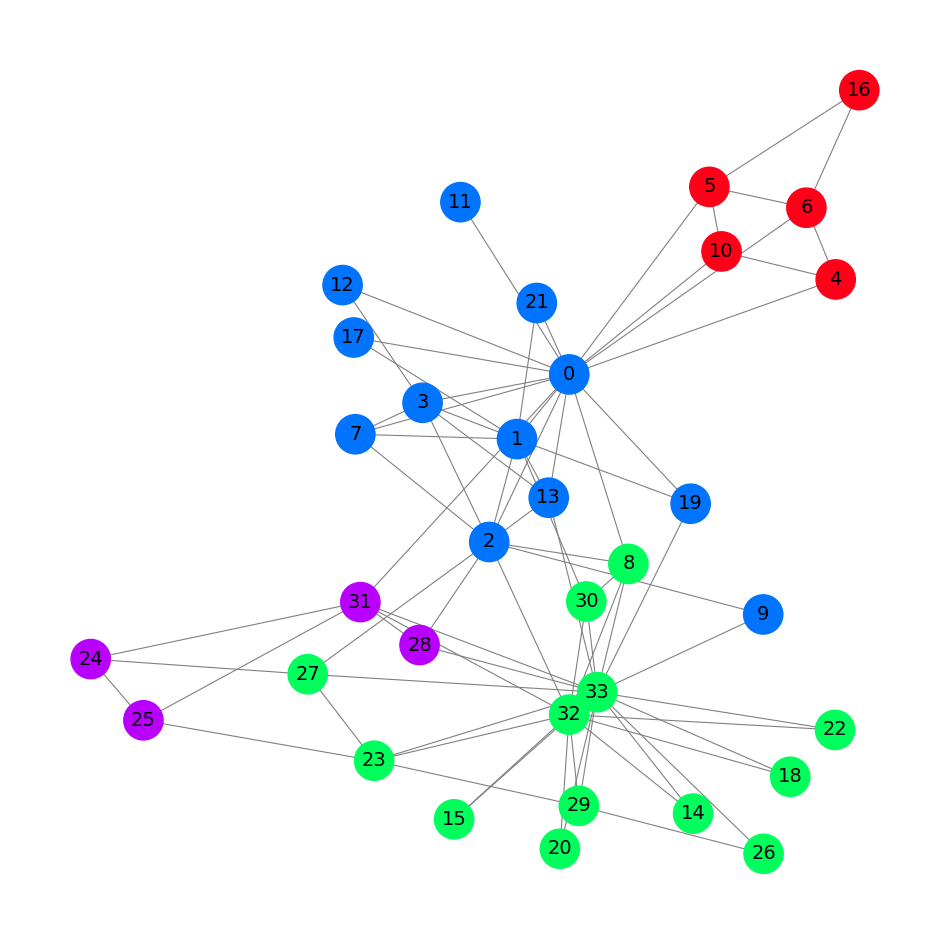

In [9]:
from torch_geometric.utils import to_networkx

G = to_networkx(data, to_undirected=True)
plt.figure(figsize=(12,12))
plt.axis('off')
nx.draw_networkx(G,
                pos=nx.spring_layout(G, seed=0),
                with_labels=True,
                node_size=800,
                node_color=data.y,
                cmap="hsv",
                vmin=-2,
                vmax=3,
                width=0.8,
                edge_color="grey",
                font_size=14
                )
plt.show()

In [13]:
import torch
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.nn import GCNConv
from torch_geometric.utils import to_networkx

# Define a simple 5-node graph with edge connections
edge_index = torch.tensor([
    [1, 1, 1, 2, 3, 4],  # Source nodes
    [2, 3, 4, 1, 1, 1]   # Target nodes
], dtype=torch.long)

# Node features: 5 nodes, each with 3 initial features
x = torch.tensor([
    [1.0, 0.5, 0.2],  # Node 1
    [0.8, 0.3, 0.7],  # Node 2
    [0.2, 0.9, 0.4],  # Node 3
    [0.5, 0.7, 0.1],  # Node 4
    [0.9, 0.2, 0.6]   # Node 5 (isolated)
], dtype=torch.float)

# Define the GCNConv layer (3D -> 2D transformation)
gcn = GCNConv(in_channels=3, out_channels=2)

# Apply the GCN layer
x_transformed = gcn(x, edge_index)

# Convert the graph to NetworkX for visualization
G = to_networkx(edge_index, to_undirected=True)

# Define function to plot the graph
def plot_graph(G, node_features, title):
    plt.figure(figsize=(6,6))
    pos = nx.spring_layout(G, seed=42)  # Compute layout
    node_colors = node_features[:, 0].detach().numpy()  # Use first feature as color
    nx.draw(G, pos, with_labels=True, node_size=800, cmap="coolwarm",
            node_color=node_colors, edge_color="gray", font_size=12)
    plt.title(title)
    plt.show()

# Plot the original graph (before GCN)
plot_graph(G, x, "Graph Before GCN Layer (3 Features)")

# Plot the transformed graph (after GCN)
plot_graph(G, x_transformed, "Graph After First GCN Layer (2 Features)")


AttributeError: 'Tensor' object has no attribute 'node_offsets'